In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# Read in CSV
df = pd.read_csv("bike_sales.csv")

In [6]:
df.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [7]:
df.columns

Index(['Date', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country',
       'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

C:\Users\garbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


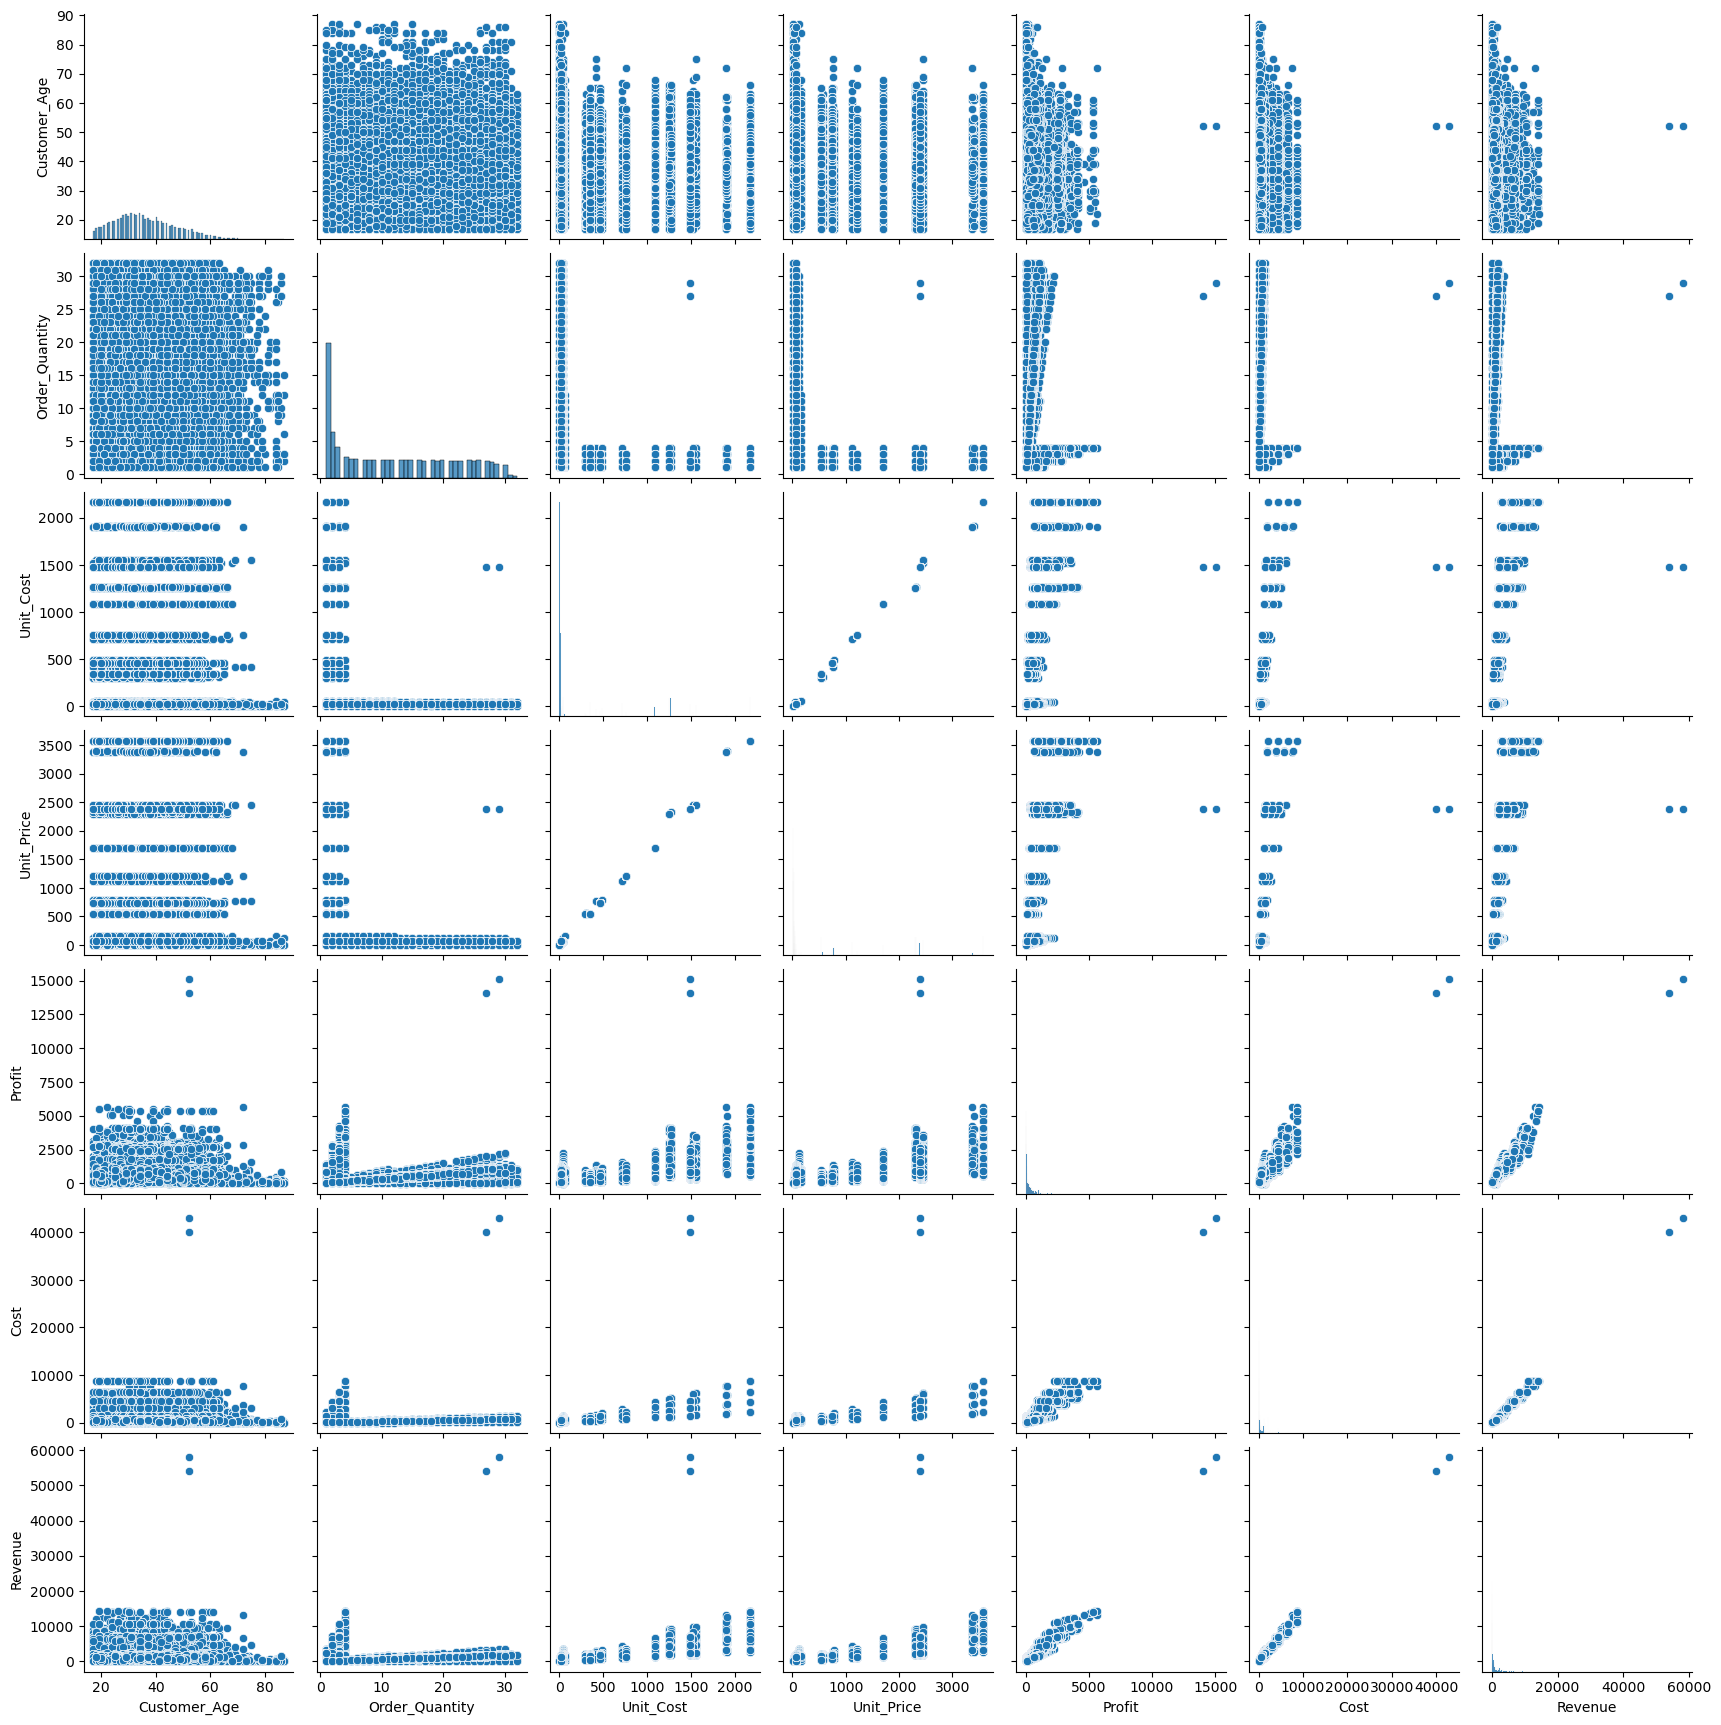

In [8]:
sns.pairplot(df)

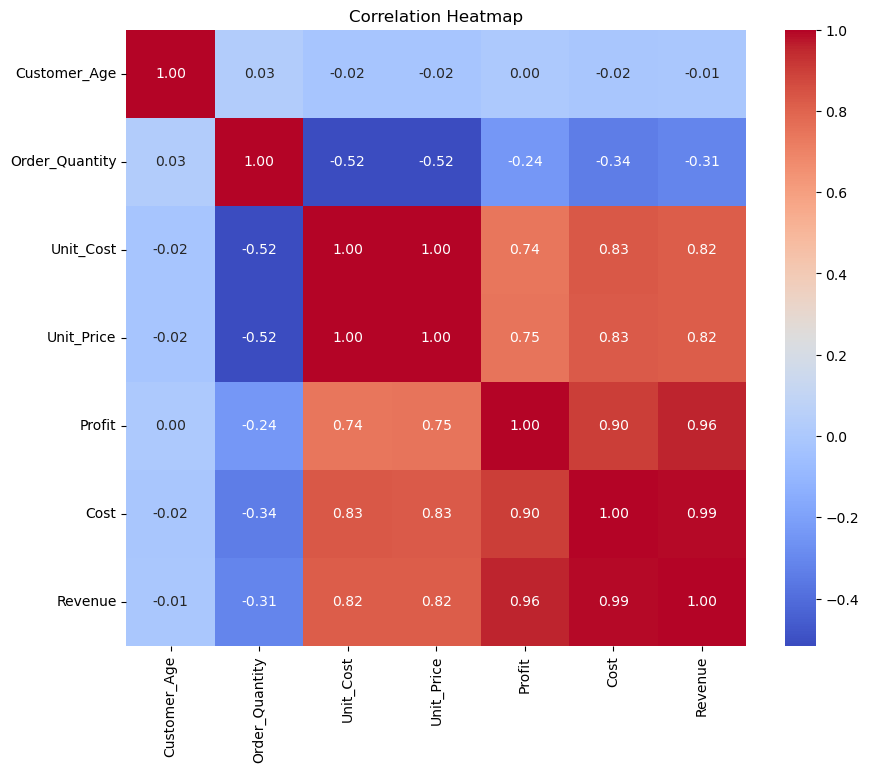

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
df.columns

Index(['Date', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country',
       'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

In [11]:
# Corrected syntax
X = df[['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Cost', 'Revenue']]


In [12]:
y = df['Profit']

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

# Now you can create an instance of LinearRegression
lm = LinearRegression()


In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.coef_

array([ 2.23252824e-14,  7.06742381e-15, -2.44798299e-15, -1.00000000e+00,
        1.00000000e+00])

In [18]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [19]:
cdf

,Coeff
Order_Quantity,2.232528e-14
Unit_Cost,7.067424e-15
Unit_Price,-2.447983e-15
Cost,-1.000000e+00
Revenue,1.000000e+00


In [20]:
predictions = lm.predict(X_test)

In [21]:
predictions

array([164., 428., 256., ..., 618.,  17., 345.])

In [22]:
y_test

106740    164
30758     428
40669     256
53764     683
36840     411
         ... 
87433       3
94240      26
33376     618
7107       17
43399     345
Name: Profit, Length: 37302, dtype: int64

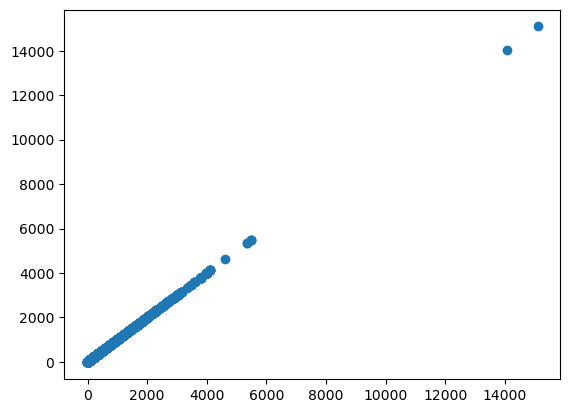

In [23]:
plt.scatter(y_test,predictions)

C:\Users\garbo\AppData\Local\Temp\ipykernel_16360\3491059997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='Profit', ylabel='Density'>

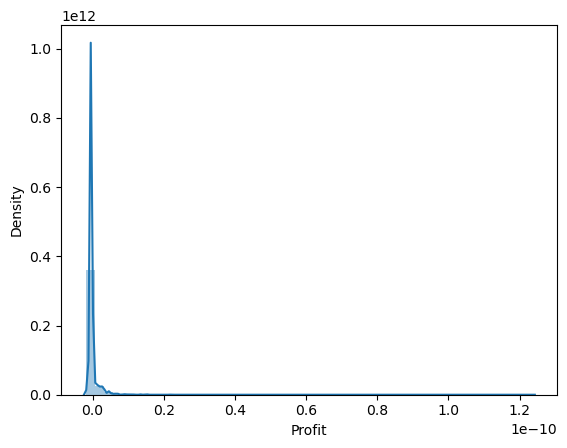

In [24]:
sns.distplot((y_test-predictions))

In [25]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.99392051192791e-13
MSE: 2.642276661510789e-24
RMSE: 1.6255081240986736e-12
